Notebook Assignment 1

In [3]:
# Step 0: Import libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import json

#humanist_vols.to_csv('web_scraped_humanist_listserv.csv')

def scrape_webpage(url): #rename function to be more meaningful
    response = requests.get(url)

    html_string = response.text
    return html_string

# Step 1: Create a function for getting the urls wuth title

#lowercase and underscores are the normal convention for naming functions in Python. Camelcasing like you had is more normal in JavaScript or for classes.
def get_content(url='', keyword='', filename='', url_head="https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/"):
    content = scrape_webpage(url)
    soup = BeautifulSoup(content, "html.parser")
    links = soup.find_all('a')

    # linkList = []
    # volumeList = [] #Save yourself having to zip your lists by just creating your dictionary from the ouset
    result = {} #Create a dictionary to store the results, and give a more descriptive name to the variable
    for link in links:
        text = link.get_text().lower()
        if keyword in text:
            result[text] = url_head + link.get('href')
            # linkList.append(url_head + link.get('href'))
            # volumeList.append(text)

    # res = dict(zip(volumeList, linkList))

    # Saving into new py doc

    with open(filename, 'w') as file:
        file.write(json.dumps(result, indent=2))

    return result

res = get_content(
    url="https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/",
    keyword="humanist",
    filename="main_page.json")

ls = []
clean_links=list(res.values())
for link in clean_links:
    url=link
    page=requests.get(url)
    page_text=page.text
    ls.append(page_text)
data={'url':clean_links,
        'text':ls}
humanist_vols = pd.DataFrame(data)
humanist_vols.to_csv('web_scraped_humanist_listserv.csv')

    

In [4]:
print(humanist_vols)

                                                  url  \
0   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
1   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
2   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
3   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
4   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
5   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
6   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
7   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
8   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
9   https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
10  https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
11  https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
12  https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
13  https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
14  https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
15  https://humanist.kdl.kcl.ac.uk/Archives/Conver...   
16  https://humanist.kdl.kcl.ac

Notebook Assignment 2

In [1]:
import pandas as pd
# disable chained assignments
pd.options.mode.chained_assignment = None

In [12]:
char_list=pd.read_csv('character_list5.csv',encoding = "ISO-8859-1")
char_map=pd.read_csv('character_mapping.csv',encoding = "ISO-8859-1")
meta=pd.read_csv('meta_data7.csv',encoding = "ISO-8859-1")

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340
...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763347777777763774163455777777777634...


In [13]:
char_list

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0
...,...,...,...,...,...
23043,9254,lumiere,1063,m,56.0
23044,9254,maurice,1107,m,71.0
23045,9254,monsieur d'arqu,114,m,58.0
23046,9254,mrs. potts,564,f,66.0


In [14]:
char_map

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466
...,...,...,...,...,...
99385,9254,tt0101414,lumiere,lumiere,nm0001583
99386,9254,tt0101414,maurice,maurice,nm0263591
99387,9254,tt0101414,mrs potts,mrs. potts,nm0001450
99388,9254,tt0101414,townsfolk,NaN,nm0621121


In [15]:
meta

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340
...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763347777777763774163455777777777634...


In [16]:
char_list['age'].isna()

0        False
1         True
2         True
3        False
4        False
         ...  
23043    False
23044    False
23045    False
23046    False
23047    False
Name: age, Length: 23048, dtype: bool

In [17]:
char_list.dtypes

script_id                int64
imdb_character_name     object
words                    int64
gender                  object
age                    float64
dtype: object

In [18]:
char_list['age'].unique()

array([  35.,   nan,   46.,   38.,   65.,   28.,   58.,   53.,   25.,
         39.,   33.,   34.,   26.,   42.,   47.,   32.,   31.,   59.,
         37.,   40.,   20.,   23.,   41.,   44.,   15.,   54.,   36.,
         30.,   49.,   48.,   60.,   66.,   13.,   61.,   50.,   55.,
         63.,   24.,   56.,   27.,   11.,   51.,   45.,   67.,   64.,
         52.,   22.,   18.,   85.,   43.,   14.,   19.,   29.,   73.,
         57.,   62.,   69.,   76.,   68.,   70.,   21.,   77.,   12.,
         72.,   17.,    8.,   16.,   79.,   75.,   10.,   80.,   71.,
          9.,    7.,   82.,   84.,   88.,   87.,    6.,   78.,   89.,
          5.,   74.,   83., 2000.,   86.,   81., 2009., 2005., 2006.,
       2007., 2001.,   90., 1999.,    3., 1993., 1980., 1995.,   91.,
          4., 2013., 1992.,  102., 1996.,   92.])

In [19]:
char_list[['age']].fillna(0.0, inplace = True)

In [20]:
char_map.columns, char_list.columns

(Index(['script_id', 'imdb_id', 'character_from_script',
        'closest_character_name_from_imdb_match', 'closest_imdb_character_id'],
       dtype='object'),
 Index(['script_id', 'imdb_character_name', 'words', 'gender', 'age'], dtype='object'))

In [21]:
char_list.rename(columns = {'imdb_character_name':'character_name'},inplace=True)
char_map.rename(columns = {'character_from_script':'character_name'},inplace=True)
#type(char_list)


In [22]:
char_list.columns, char_map.columns

(Index(['script_id', 'character_name', 'words', 'gender', 'age'], dtype='object'),
 Index(['script_id', 'imdb_id', 'character_name',
        'closest_character_name_from_imdb_match', 'closest_imdb_character_id'],
       dtype='object'))

In [28]:
char_merged = pd.merge(char_list, char_map, on = 'character_name')
char_merged

,script_id_x,character_name,words,gender,age,script_id_y,imdb_id,closest_character_name_from_imdb_match,closest_imdb_character_id
0,280,betty,311,f,35.0,129,tt0104797,dr. betty shabazz,nm0000291
1,280,betty,311,f,35.0,153,tt0171580,betty sizemore,nm0000250
2,280,betty,311,f,35.0,163,tt0120789,betty parker,nm0000260
3,280,betty,311,f,35.0,178,tt0083067,betty hapschatt,nm0915375
4,280,betty,311,f,35.0,280,tt0112579,betty,nm0529137
...,...,...,...,...,...,...,...,...,...
424606,9254,cogsworth,1658,m,49.0,9254,tt0101414,cogsworth,nm0001773
424607,9254,lefou,415,m,NaN,9254,tt0101414,lefou,nm0181425
424608,9254,lumiere,1063,m,56.0,9254,tt0101414,lumiere,nm0001583
424609,9254,wardrobe,121,f,54.0,4947,tt0083067,wardrobe mistress,nm0163256


In [24]:
len(char_list), len(char_map)

(23048, 99390)

In [25]:
meta.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


In [26]:
char_list.head()

,script_id,character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [27]:
char_map.head()

,script_id,imdb_id,character_name,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466


In [29]:
full = pd.merge(char_merged, meta, on = 'imdb_id')
full

,script_id_x,character_name,words,gender,age,script_id_y,imdb_id,closest_character_name_from_imdb_match,closest_imdb_character_id,script_id,title,year,gross,lines_data
0,280,betty,311,f,35.0,129,tt0104797,dr. betty shabazz,nm0000291,1126,Malcolm X,1992,101.0,7765357253301777777777754377776656774737777777...
1,280,betty,311,f,35.0,1126,tt0104797,dr. betty shabazz,nm0000291,1126,Malcolm X,1992,101.0,7765357253301777777777754377776656774737777777...
2,280,betty,311,f,35.0,2826,tt0104797,dr. betty shabazz,nm0000291,1126,Malcolm X,1992,101.0,7765357253301777777777754377776656774737777777...
3,280,betty,311,f,35.0,2827,tt0104797,dr. betty shabazz,nm0000291,1126,Malcolm X,1992,101.0,7765357253301777777777754377776656774737777777...
4,280,betty,311,f,35.0,4581,tt0104797,dr. betty shabazz,nm0000291,1126,Malcolm X,1992,101.0,7765357253301777777777754377776656774737777777...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405507,7426,texan,979,m,50.0,8413,tt0100485,texan,nm0304000,7426,Revenge,1990,32.0,7777776334564443336727763475677777777577663477...
405508,7426,tibey,1895,m,75.0,7426,tt0100485,tibey,nm0000063,7426,Revenge,1990,32.0,7777776334564443336727763475677777777577663477...
405509,7426,tibey,1895,m,75.0,8413,tt0100485,tibey,nm0000063,7426,Revenge,1990,32.0,7777776334564443336727763475677777777577663477...
405510,8115,knox,344,m,43.0,7096,tt0129332,knox,nm0818880,8115,Ravenous,1999,3.0,77777777777777777777777777777777775


In [35]:
words_year = full.drop(columns=['script_id_x', 'script_id_y', 'script_id', 'character_name','imdb_id', 'title', 'gross', 'lines_data', 'closest_imdb_character_id', 'gender', 'age', 'lines_data', 'closest_character_name_from_imdb_match'])
words_year

,words,year
0,311,1992
1,311,1992
2,311,1992
3,311,1992
4,311,1992
...,...,...
405507,979,1990
405508,1895,1990
405509,1895,1990
405510,344,1999


In [37]:
import matplotlib.pyplot as plt

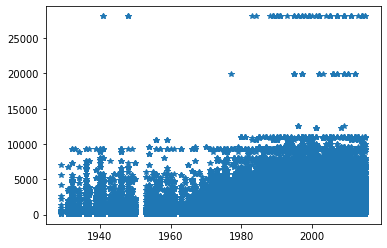

In [38]:
plt.plot(words_year['year'], words_year['words'], '*')

In [57]:
words_gender = full.drop(columns=['script_id_x', 'script_id_y', 'script_id', 'character_name','imdb_id', 'title', 'gender', 'lines_data', 'closest_imdb_character_id', 'age', 'lines_data', 'closest_character_name_from_imdb_match'])
words_gender

words_gender[['gross']].isna()
word_gender = words_gender.dropna()

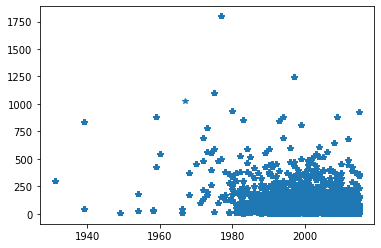

In [58]:
plt.plot(words_year['year'], words_gender['gross'], '*')